# **Lab 1.1 Image Representation**

In [3]:
import cv2
import numpy as np
import math
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import mpl_toolkits

%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## **Image Color Order with different libraries**
In this part, you will explore how different libraries interpret and display image colors. Specifically, you will compare Matplotlib and OpenCV libraries for image loading and display.

**Load and Display Images:**
   - Load an image using both Matplotlib `plt.imread()` and OpenCV `cv2.imread()` libraries.
   - Display the images side by side using Matplotlib.

**HINT** : `plt.imread()`,`cv2.imread()`,`fig, axs = plt.subplots(1, 2)`
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab1_image-representation/asset/1-1.png)


</details>

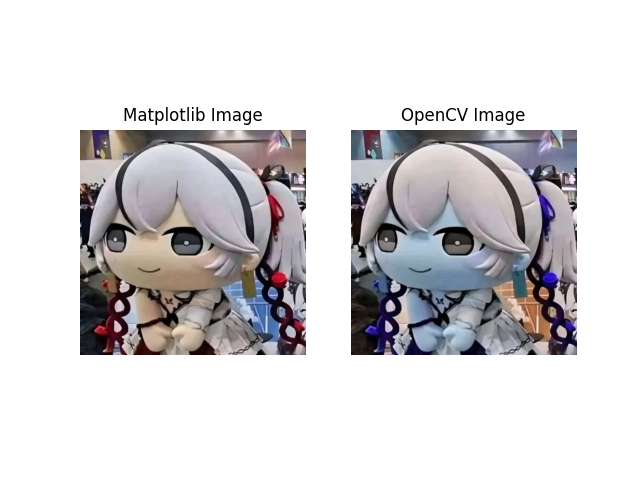

In [18]:
### START CODE HERE ###

mpl_img = plt.imread("asset/Camellya.webp")
cv_img = cv2.imread("asset/Camellya.webp")

fig, axs = plt.subplots(1, 2)

axs[0].imshow(mpl_img)
axs[0].set_title("Matplotlib Image")
axs[0].axis('off')

axs[1].imshow(cv_img)
axs[1].set_title("OpenCV Image")
axs[1].axis('off')



plt.show()
### END CODE HERE ###

### Opencv [BGR] vs Matplotlib [RGB]
Examine the grayscale representations of individual color channels for each library.
***PLEASE use direct slicing method***

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab1_image-representation/asset/1-2.png)

</details>

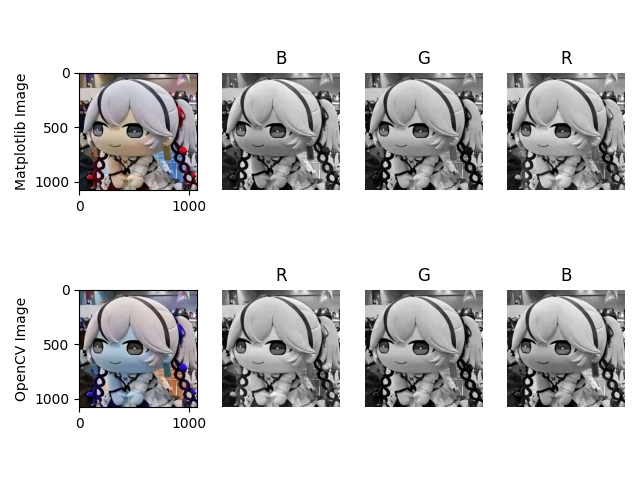

In [19]:
### START CODE HERE ###

mpl_img = plt.imread("asset/Camellya.webp")
cv_img = cv2.imread("asset/Camellya.webp")

fig, axs = plt.subplots(2, 4)

# Show original images
axs[0, 0].imshow(mpl_img)
axs[0, 0].set_ylabel("Matplotlib Image")
# axs[0, 0].axis('Off')

axs[1, 0].imshow(cv_img)
axs[1, 0].set_ylabel("OpenCV Image")
# axs[1, 0].axis('off')

# Matplotlib channels (RGB)
axs[0, 1].imshow(mpl_img[:, :, 2], cmap='gray')
axs[0, 1].set_title("B")
axs[0, 1].axis('off')

axs[0, 2].imshow(mpl_img[:, :, 1], cmap='gray')
axs[0, 2].set_title("G")
axs[0, 2].axis('off')

axs[0, 3].imshow(mpl_img[:, :, 0], cmap='gray')
axs[0, 3].set_title("R")
axs[0, 3].axis('off')

# OpenCV channels (BGR)
axs[1, 1].imshow(cv_img[:, :, 2], cmap='gray')
axs[1, 1].set_title("R")
axs[1, 1].axis('off')

axs[1, 2].imshow(cv_img[:, :, 1], cmap='gray')
axs[1, 2].set_title("G")
axs[1, 2].axis('off')

axs[1, 3].imshow(cv_img[:, :, 0], cmap='gray')
axs[1, 3].set_title("B")
axs[1, 3].axis('off')

plt.tight_layout()
plt.show()
### END CODE HERE ###

##### Opencv BGR -> RGB
Compare the images displayed after conversion using both methods (`cv2.cvtColor()` and `direct slicing`).

Use `cv2.cvtColor()`
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image-3.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab1_image-representation/asset/1-3.png)

</details>

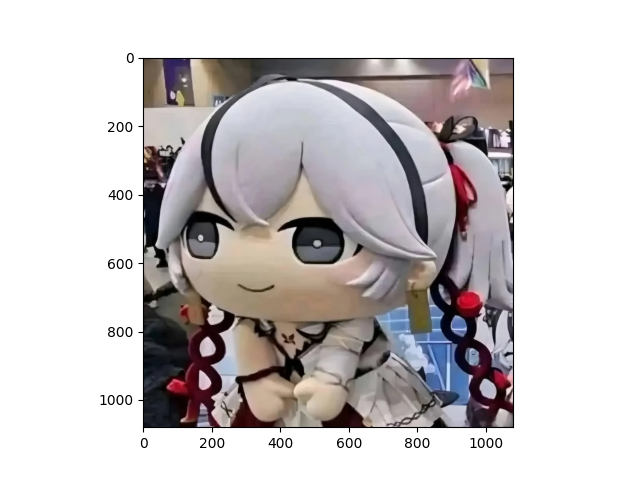

In [20]:
### START CODE HERE ###
img = cv2.imread("asset/Camellya.webp")
cvt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 1)
axs.imshow(cvt)
### END CODE HERE ###

Use `direct slicing method (array[...])`
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image-3.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab1_image-representation/asset/1-4.png)

</details>

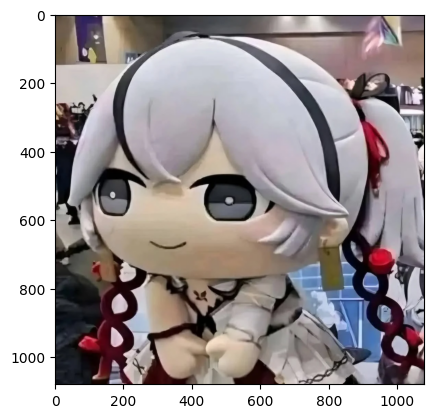

In [ ]:
### START CODE HERE ###

img = cv2.imread("asset/Camellya.webp")

fig, axs = plt.subplots(1, 1)
axs.imshow(img[:, :, ::-1])

plt.show()
### END CODE HERE ###

## **Image Reshape**

Implement the code to tranform the image from ***channels last (HWC) to channels first (CHW)***.<br>

**NumPy Transpose**<br>
Compare the difference between :
- `np.transpose(<img>)`
- `np.transpose(<img>,(2,0,1))`

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical
- The image display only the Red channel.

```
np.transpose(mpl_img) => Before : (3265, 4898, 3) | After : (3, 4898, 3265)
np.transpose(mpl_img,(2,0,1)) => Before : (3265, 4898, 3) | After : (3, 3265, 4898)
```

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab1_image-representation/asset/1-5.png)

</details>

np.transpose(mpl_img) => Before : (1080, 1080, 3) | After : (3, 1080, 1080)
np.transpose(mpl_img,(2,0,1)) => Before : (1080, 1080, 3) | After : (3, 1080, 1080)


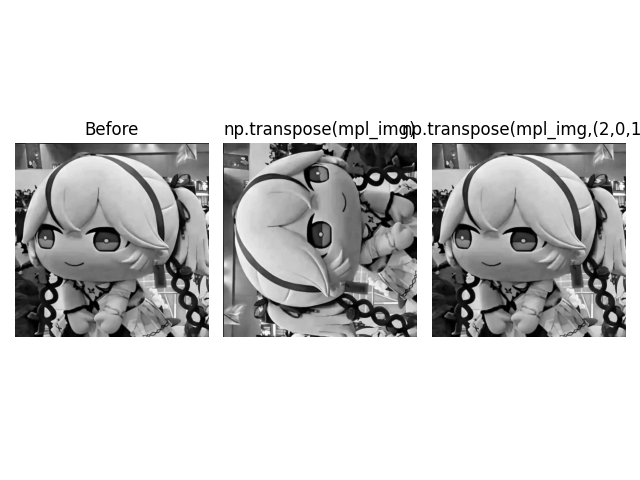

In [21]:
### START CODE HERE ###
img = cv2.imread("asset/Camellya.webp")

reshaped_trade_trans = np.transpose(img)
print('np.transpose(mpl_img) => Before :',mpl_img.shape,'| After :',reshaped_trade_trans.shape)


reshaped_trans = np.transpose(img, (2, 0, 1))
print('np.transpose(mpl_img,(2,0,1)) => Before :',mpl_img.shape,'| After :',reshaped_trans.shape)


fig, axs = plt.subplots(1,3)

axs[0].imshow(img[:, :, 0], cmap='gray')
axs[0].set_title("Before")
axs[0].axis('off')

axs[1].imshow(reshaped_trade_trans[0, :, :], cmap='gray')
axs[1].set_title("np.transpose(mpl_img)")
axs[1].axis('off')

axs[2].imshow(reshaped_trans[0, :, :], cmap='gray')
axs[2].set_title("np.transpose(mpl_img,(2,0,1))")
axs[2].axis('off')

plt.tight_layout()
plt.show()



### END CODE HERE ###

If you code work properly, the cell below should run without error.

In [9]:
assert reshaped_trade_trans.shape == (mpl_img.shape[2], mpl_img.shape[1], mpl_img.shape[0]), \
    f"Error: Shape mismatch after traditional transpose. Expected {(mpl_img.shape[1], mpl_img.shape[0], mpl_img.shape[2])}, got {reshaped_trade_trans.shape}"
print("Assertion for traditional transpose passed successfully.")

assert reshaped_trans.shape == (mpl_img.shape[2], mpl_img.shape[0], mpl_img.shape[1]), \
    f"Error: Shape mismatch after specified transpose. Expected {(mpl_img.shape[2], mpl_img.shape[0], mpl_img.shape[1])}, got {reshaped_trans.shape}"
print("Assertion for specified transpose passed successfully.")

Assertion for traditional transpose passed successfully.
Assertion for specified transpose passed successfully.


**NumPy Reshape**

Use `np.reshape()`. Ensure the new shape is (3, height, width).
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical
- The image display only the Red channel.

```
Before : (3265, 4898, 3) | After : (3, 3265, 4898)
```

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab1_image-representation/asset/1-6.png)

</details>

Before : (1080, 1080, 3) | After : (3, 1080, 1080)


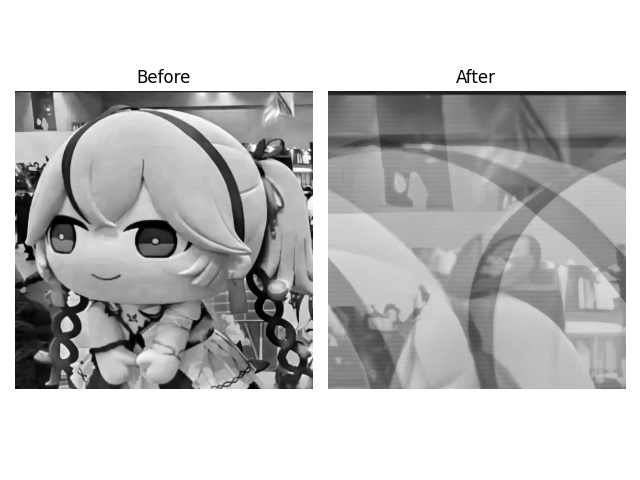

In [22]:
### START CODE HERE ###
mpl_img = plt.imread("asset/Camellya.webp")

# Get the shape
h, w, c = mpl_img.shape

# Reshape to (3, height, width)
reshaped_reshape = np.reshape(mpl_img, (c, h, w))
print('Before :', mpl_img.shape, '| After :', reshaped_reshape.shape)

fig, axs = plt.subplots(1, 2)

# Show the original Red channel
axs[0].imshow(mpl_img[:, :, 0], cmap='gray')
axs[0].set_title("Before")
axs[0].axis('off')

# Show the reshaped Red channel
axs[1].imshow(reshaped_reshape[0, :, :], cmap='gray')
axs[1].set_title("After")
axs[1].axis('off')

plt.tight_layout()
plt.show()





### END CODE HERE ###

If you code work properly, the cell below should run without error.

In [11]:
assert reshaped_reshape.shape == (mpl_img.shape[2], mpl_img.shape[0], mpl_img.shape[1]), \
    f"Error: Shape mismatch after reshape. Expected {(mpl_img.shape[2], mpl_img.shape[0], mpl_img.shape[1])}, got {reshaped_reshape.shape}"
print("Assertion for reshape passed successfully.")

Assertion for reshape passed successfully.


**NumPy moveaxis**

Use `np.moveaxis` to move the channels axis from the last position to the first.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical
- The image display only the Red channel.

```
Before : (3265, 4898, 3) | After : (3, 3265, 4898)
```

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab1_image-representation/asset/1-7.png)

</details>

(np.float64(-0.5), np.float64(1079.5), np.float64(1079.5), np.float64(-0.5))

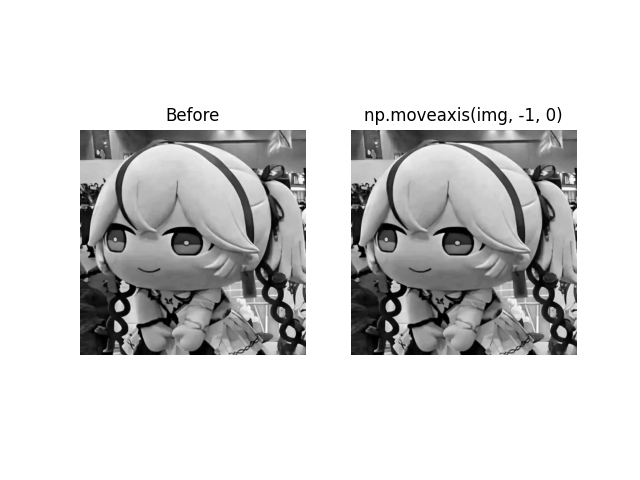

In [23]:
### START CODE HERE ###

img = cv2.imread("asset/Camellya.webp")

reshaped_mvx = np.moveaxis(img, -1, 0)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(img[:, :, 0], cmap='gray')
axs[0].set_title("Before")  
axs[0].axis('off')

axs[1].imshow(reshaped_mvx[0, :, :], cmap='gray')
axs[1].set_title("np.moveaxis(img, -1, 0)")   
axs[1].axis('off')




### END CODE HERE ###

If you code work properly, the cell below should run without error.

In [13]:
assert reshaped_mvx.shape == (mpl_img.shape[2], mpl_img.shape[0], mpl_img.shape[1]), \
    f"Error: Shape mismatch after np.moveaxis. Expected {(mpl_img.shape[2], mpl_img.shape[0], mpl_img.shape[1])}, got {reshaped_mvx.shape}"
print("Assertion for np.moveaxis passed successfully.")

Assertion for np.moveaxis passed successfully.


## **Reduce Bit Depth using Quantization**
In this part, you will explore how to reduce the bit depth of an image using quantization. Quantization is a technique used to map pixel values from a continuous range to a smaller set of discrete values, effectively reducing the number of bits used to represent each pixel.
$$
\begin{align*}
Q_{level} &= 2^{bit dept-1}\\
Q &= floor(NormValue(S_i) * Q_{level})\\
Q &= floor((\frac{S_i-S_{min}}{S_{max}-S_{min}})*Q_{level})
\end{align*}
$$

Please complete the function below.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab1_image-representation/asset/1-8.png)

</details>

In [24]:
### START CODE HERE ###
def quantize(img,bit_dept):
    img = img.astype(np.float32)
    max_val = 2 ** bit_dept - 1
    img = np.floor(img / 255 * max_val).astype(np.uint8)

    return img


### END CODE HERE ###

(np.float64(-0.5), np.float64(1079.5), np.float64(1079.5), np.float64(-0.5))

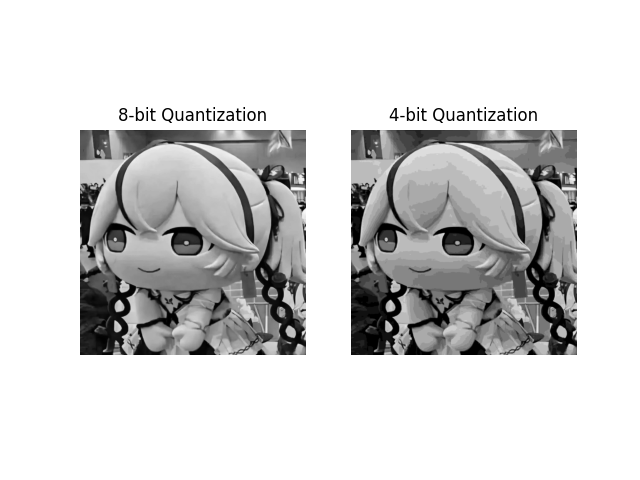

In [25]:
### START CODE HERE ###
cv_img = cv2.imread("asset/Camellya.webp")
gray_img = cv2.cvtColor(cv_img, cv2.COLOR_RGB2GRAY)
bd8 = quantize(gray_img, 8)
bd4 = quantize(gray_img, 4)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(bd8, cmap='gray')
axs[0].set_title("8-bit Quantization")
axs[0].axis('off')

axs[1].imshow(bd4, cmap='gray')
axs[1].set_title("4-bit Quantization")
axs[1].axis('off')

### END CODE HERE ###

If you code work properly, the cell below should run without error.

In [16]:
max_value_bd8 = 2**8 - 1
max_value_bd4 = 2**4 - 1

assert np.min(bd8) >= 0 and np.max(bd8) <= max_value_bd8, \
    f"Error: Values in bd8 are out of expected range 0-{max_value_bd8}. Got min={np.min(bd8)}, max={np.max(bd8)}"
assert np.min(bd4) >= 0 and np.max(bd4) <= max_value_bd4, \
    f"Error: Values in bd4 are out of expected range 0-{max_value_bd4}. Got min={np.min(bd4)}, max={np.max(bd4)}"


## **3D Image Surface**

use `plot_surface()` to plot the image in 3D space, where the z-axis represents the normalized pixel intensity values.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![3d-surface.gif](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab1_image-representation/asset/3d-surface.gif)

</details>

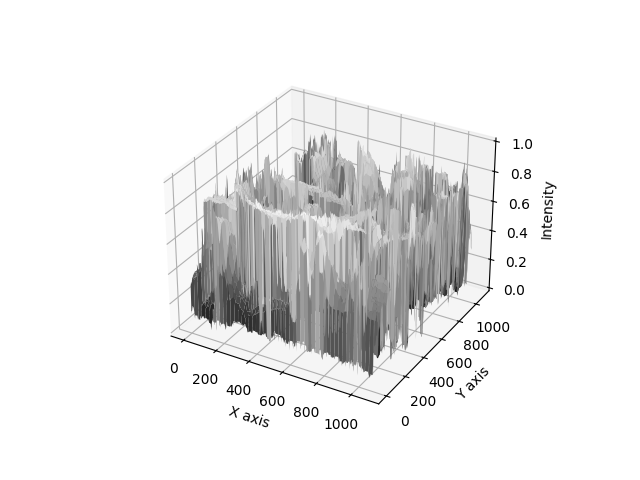

In [17]:
%matplotlib ipympl 
### START CODE HERE ###
img = cv2.imread("asset/Camellya.webp")
cv_img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

y = range(cv_img_gray.shape[0])
x = range(cv_img_gray.shape[1])
X, Y = np.meshgrid(x, y)
Z = cv_img_gray / 255.0

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.plot_surface(X, Y, Z, cmap='gray', edgecolor='none')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Intensity')


plt.show()
### END CODE HERE ###


---

## **Question**
1. How to perform manual color conversion (using only array slicing) of image array read from openCV (BGR) to RGB?
2. How to perform manual conversion (using only array slicing) of image array from channel last to channel first?
3. Why does np.reshape destroy the image integrity?

1.ใน openCV มีการเรียงสีในแชแนลเป็น BGR [:,:,[B,G,R]] เมื่อจะ convert สีเราสามรถใช้ array slicing แบบนี้ img[:, :, ::-1] 
เพื่อสลับให้เป็น [:,:,[R,G,B]]

2.ใช้คำสั่ง img.trasnpose(2,0,1) โดย 2 คือ Channels 0 คือ Height 1 คือ Width เพราะใน vector ของ chanel last [H,W,C] เมื่อสลับด้วย trasnpose(2,0,1) จะทำให้ได้ chanel first [C,H,W]

3.เพราะ np.reshape ไม่ได้ทำการเรียง data ใหม่มันเปลี่ยนแค่รูปร่างของภาพเท่านั้นทำให้แต่ละ pixel ของรูปไปปนในส่วนต่าง ๆ ของแต่ละ chanel ทำให้รูปไม่เหมือนเดิมถ้าเราเรียกแต่ละ chanel ออกมาดู